In [305]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import scipy.stats as stats


In [306]:
from google.colab import drive


In [307]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/auto-mpg.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [308]:
np.random.seed(42)

In [309]:
df_before = df.copy()

In [310]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [311]:
#columns of data
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [312]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [313]:
# Summary statistics
print(df.describe())




              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [314]:
#shape of data
df.shape

(398, 9)

In [315]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [316]:
#checking for duplicated values
df.duplicated().sum()

0

In [317]:
df['cylinders'].value_counts()

,count
cylinders,
4,204
8,103
6,84
3,4
5,3


In [318]:
df['model year'].value_counts()

,count
model year,
73,40
78,36
76,34
82,31
75,30
70,29
79,29
80,29
81,29


In [319]:
df['origin'].value_counts()

,count
origin,
1,249
3,79
2,70


In [320]:
df["car name"].nunique()

305

In [321]:
df['origin'].value_counts()

,count
origin,
1,249
3,79
2,70


In [322]:

# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


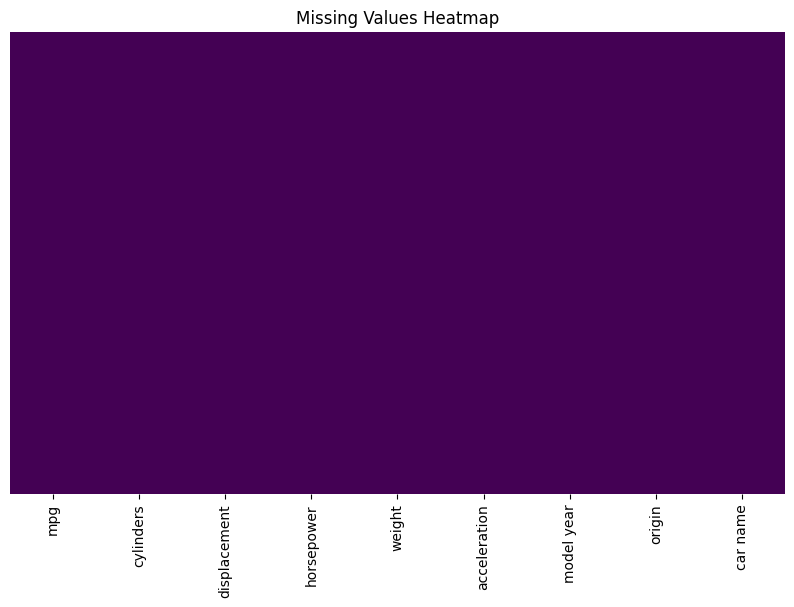

In [323]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [324]:
# Convert 'horsepower' to numeric, setting invalid parsing as NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Function to impute numeric missing values with the median
def impute_numeric(df, columns):
    for col in columns:
        median = df[col].median()  # Calculate the median
        df[col] = df[col].fillna(median)  # Fill missing values with median

# Function to impute categorical missing values with the mode
def impute_categorical(df, columns):
    for col in columns:
        mode = df[col].mode()[0]  # Calculate the mode
        df[col] = df[col].fillna(mode)  # Fill missing values with mode

In [325]:
print(df['horsepower'].dtype)
print(df['origin'].dtype)

float64
int64


<Axes: >

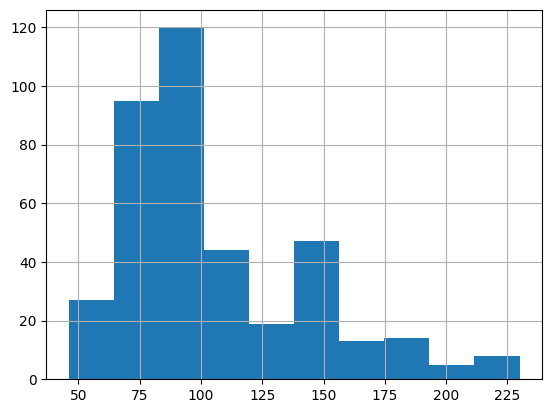

In [326]:
#Distribution of horsepower for all cars
df["horsepower"].hist()

In [327]:
# Identify numeric and categorical columns
numeric_cols = ['displacement', 'horsepower', 'weight', 'acceleration', 'model year']
categorical_cols = ['car name', 'origin']


In [328]:
# Impute missing values
impute_numeric(df, numeric_cols)
impute_categorical(df, categorical_cols)

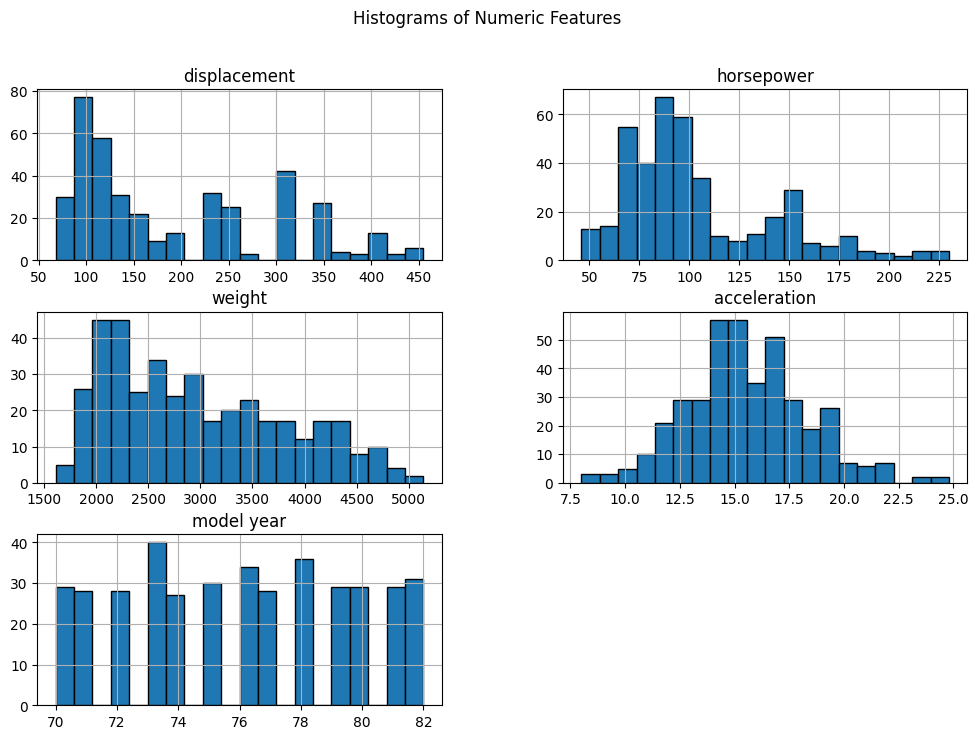

In [329]:
# Plot histograms for numeric columns
df[numeric_cols].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()

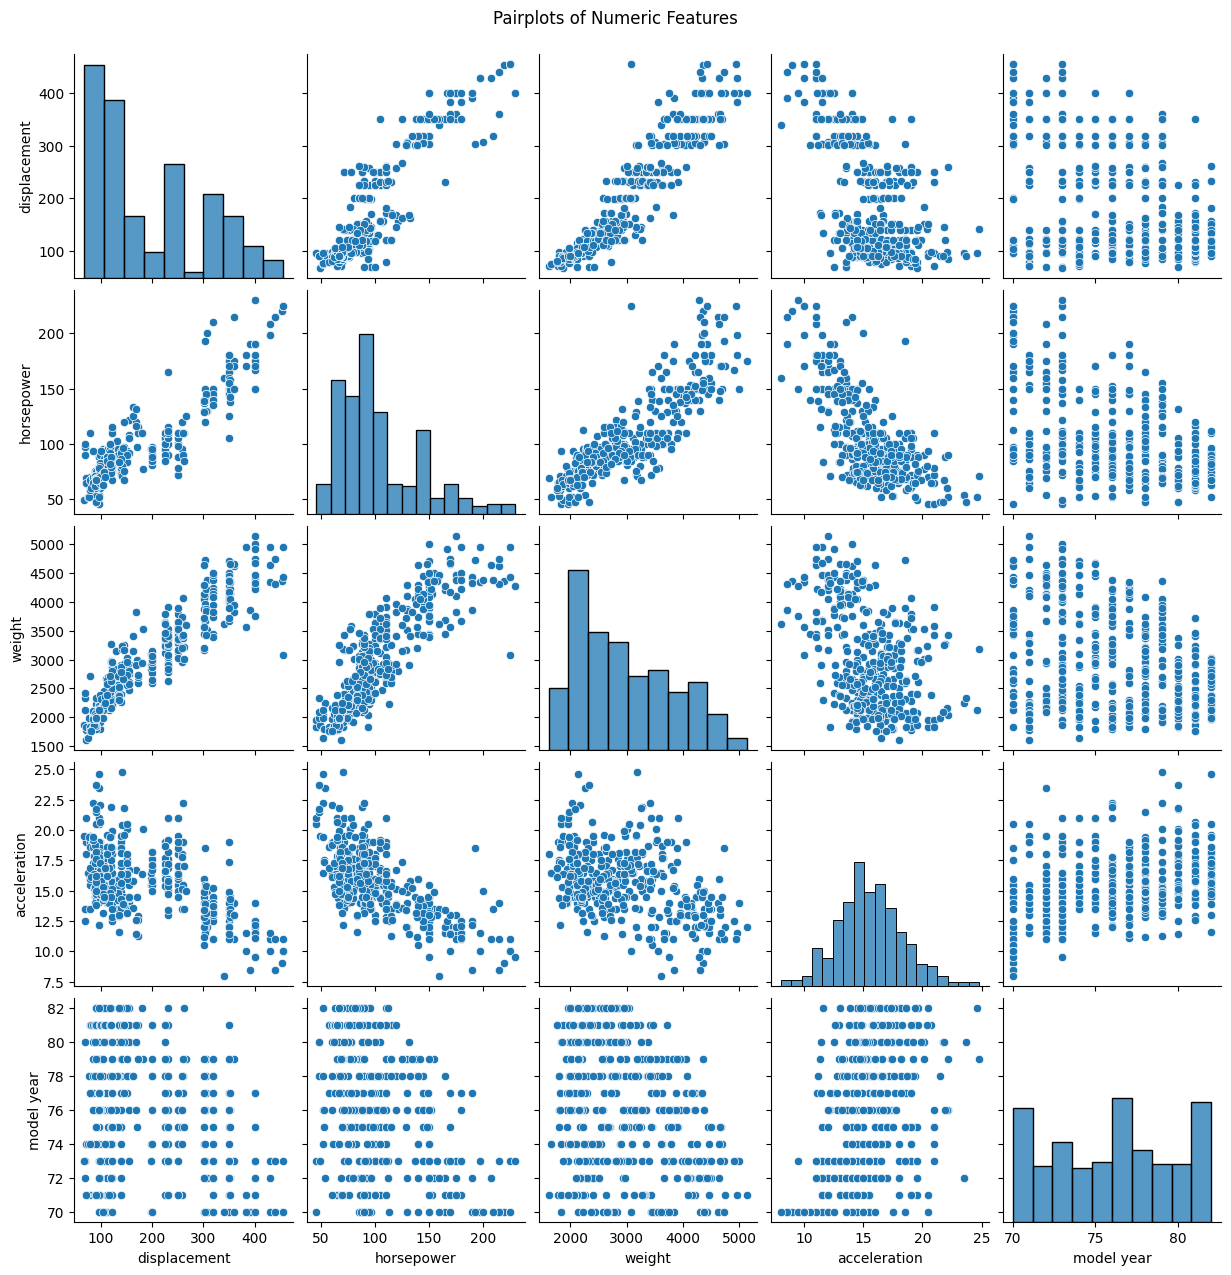

In [330]:
# Visualizing pairplots for numeric columns before handling outliers
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplots of Numeric Features', y=1.02)
plt.show()

In [331]:
# Handle outliers using Z-Score
def handle_outliers_zscore(df, columns, threshold=3, cap=True):
    for col in columns:
        mean = df[col].mean()
        std_dev = df[col].std()
        z_scores = (df[col] - mean) / std_dev

        if cap:
            lower_bound = mean - threshold * std_dev
            upper_bound = mean + threshold * std_dev
            df[col] = np.clip(df[col], lower_bound, upper_bound)
        else:
            df = df[(np.abs(z_scores) <= threshold)]

    return df

# Handle outliers in numeric columns
df_cleaned = handle_outliers_zscore(df, numeric_cols)

In [332]:
# Verify the data types
print("Data types after handling outliers:")
print(df_cleaned.dtypes)

# Verify that there are no extreme values
print("\nSummary statistics after handling outliers:")
print(df_cleaned.describe())

Data types after handling outliers:
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Summary statistics after handling outliers:
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.228290  2970.424623   
std      7.815984    1.701004    104.269838   37.986423   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  218.971895  5140.000000   

       acceleration  model year      ori

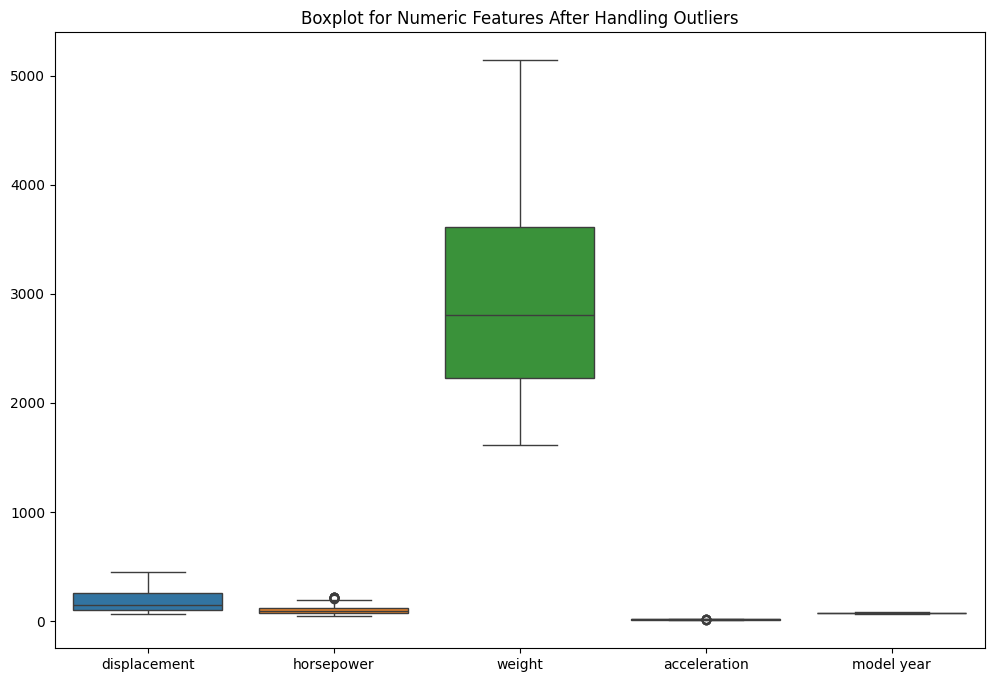

In [333]:

# Visualize boxplots for numeric columns to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title('Boxplot for Numeric Features After Handling Outliers')
plt.show()

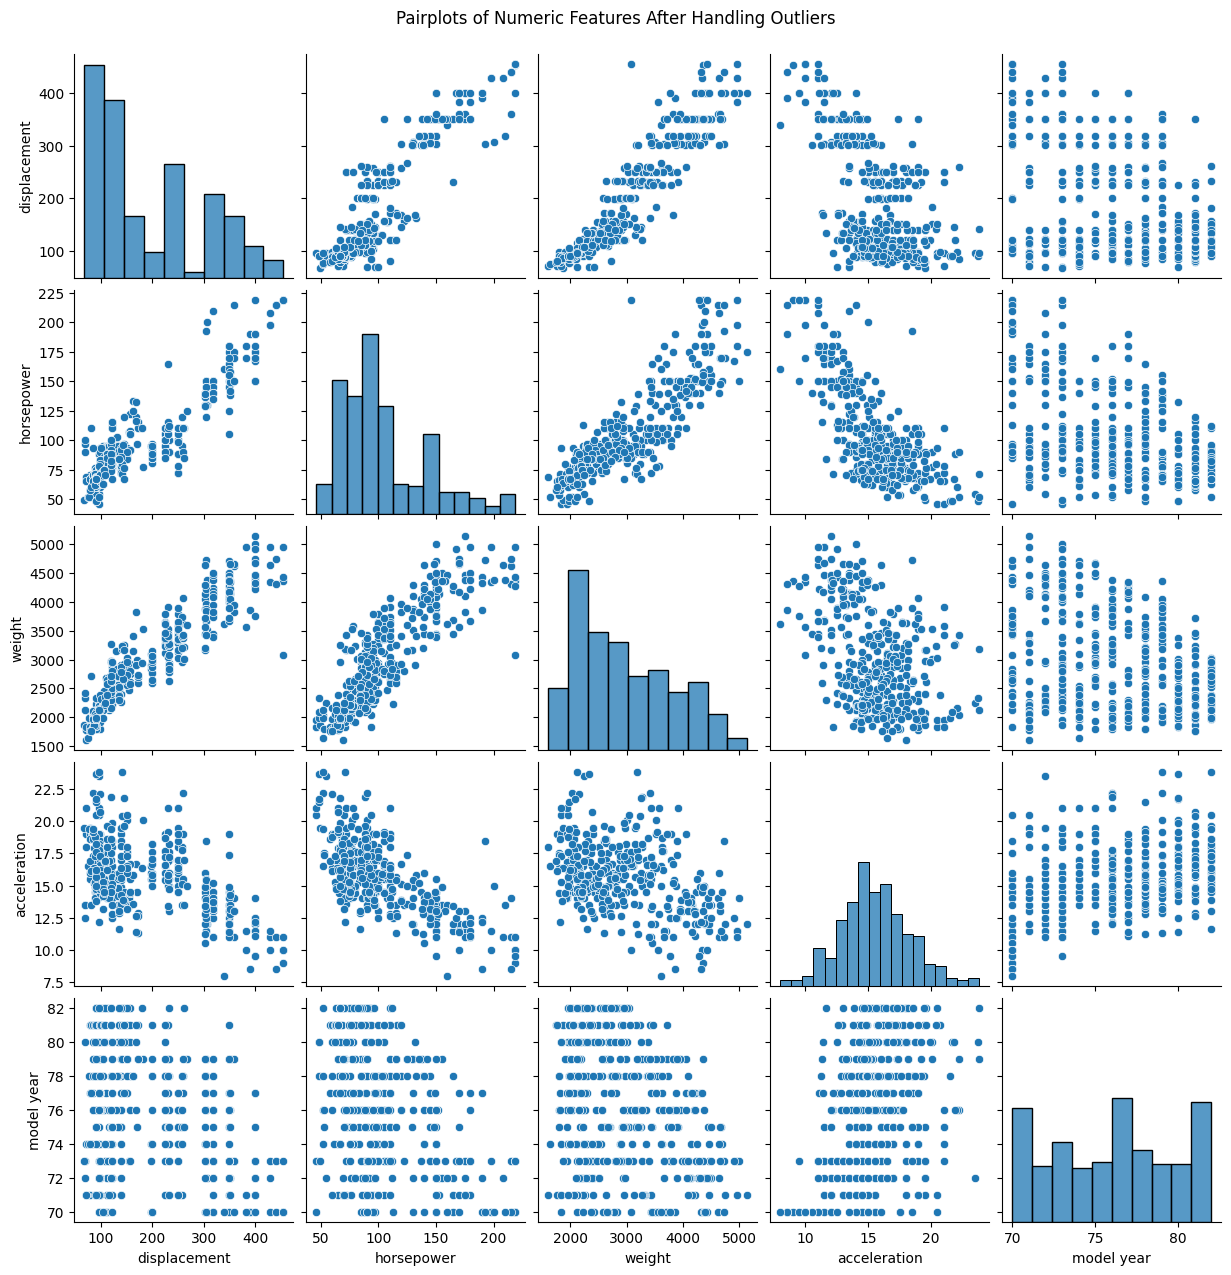

In [334]:
# Visualize pairplots after handling outliers
sns.pairplot(df_cleaned[numeric_cols])
plt.suptitle('Pairplots of Numeric Features After Handling Outliers', y=1.02)
plt.show()

In [335]:
#Range of horsepower
print("minimum value: {} \nmaximum value : {}".format(df["horsepower"].min(),df.horsepower.max()))

minimum value: 46.0 
maximum value : 218.97189470482851


In [336]:
# Min-Max Scaling
def min_max_scaling(df, columns):
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)

# Apply Min-Max Scaling
min_max_scaling(df_cleaned, numeric_cols)

# Standardization
def standardize(df, columns):
    for col in columns:
        mean = df[col].mean()
        std_dev = df[col].std()
        df[col] = (df[col] - mean) / std_dev

# Apply Standardization
standardize(df_cleaned, numeric_cols)


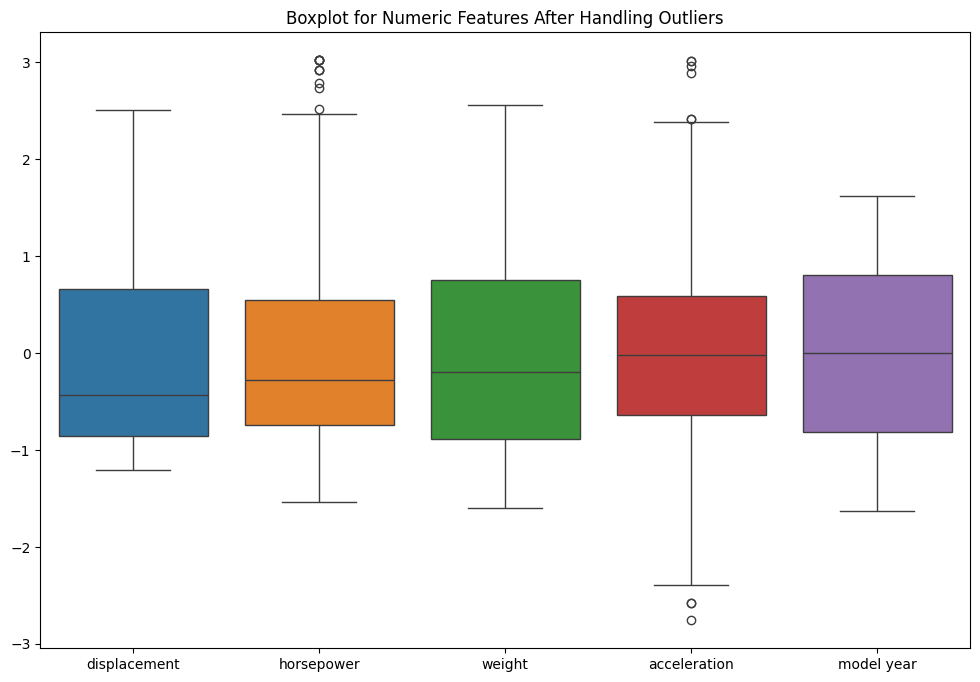

In [337]:

# Visualize boxplots for numeric columns to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title('Boxplot for Numeric Features After Handling Outliers')
plt.show()

In [338]:
print("\nData after Min-Max Scaling:")
print(df_cleaned[numeric_cols].describe())


Data after Min-Max Scaling:
       displacement    horsepower        weight  acceleration    model year
count  3.980000e+02  3.980000e+02  3.980000e+02    398.000000  3.980000e+02
mean   8.926416e-17 -1.071170e-16 -3.570567e-17      0.000000 -2.142340e-16
std    1.000000e+00  1.000000e+00  1.000000e+00      1.000000  1.000000e+00
min   -1.202897e+00 -1.532871e+00 -1.602926e+00     -2.756489 -1.625381e+00
25%   -8.552414e-01 -7.431152e-01 -8.817168e-01     -0.633667 -8.140493e-01
50%   -4.308617e-01 -2.824243e-01 -1.971143e-01     -0.023242 -2.718028e-03
75%    6.576602e-01  5.468193e-01  7.528861e-01      0.587184  8.086132e-01
max    2.508627e+00  3.020648e+00  2.561961e+00      3.016551  1.619944e+00


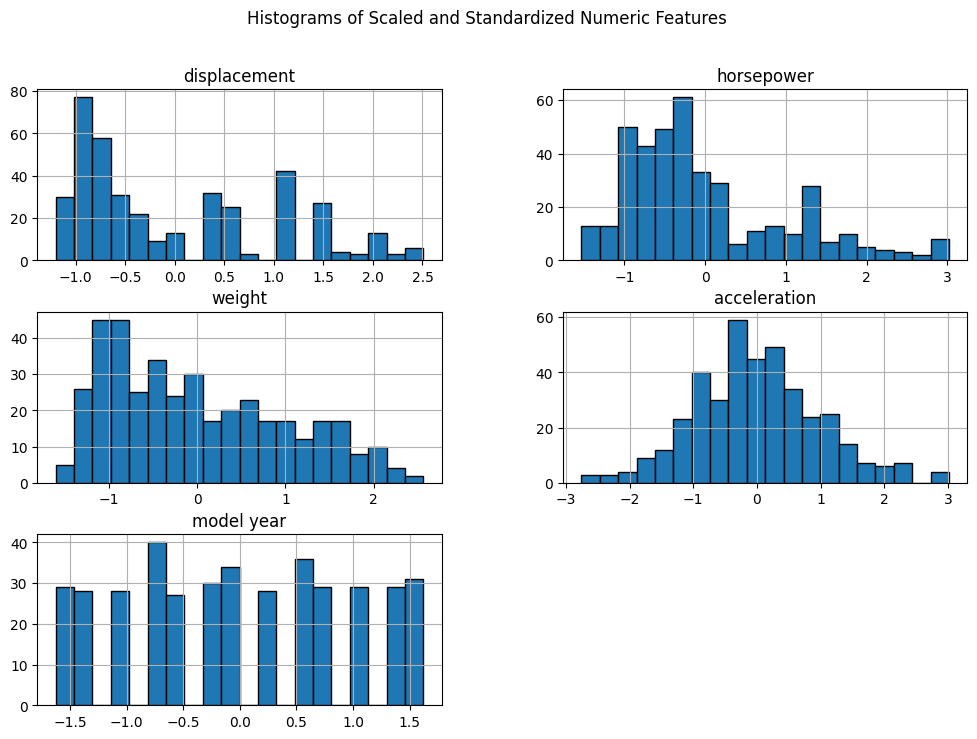

In [339]:
# Distribution of scaled and standardized numeric features
df_cleaned[numeric_cols].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms of Scaled and Standardized Numeric Features')
plt.show()

Linear Regression (Gradient Descent) - MSE: 10.0631, R-squared: 0.8167


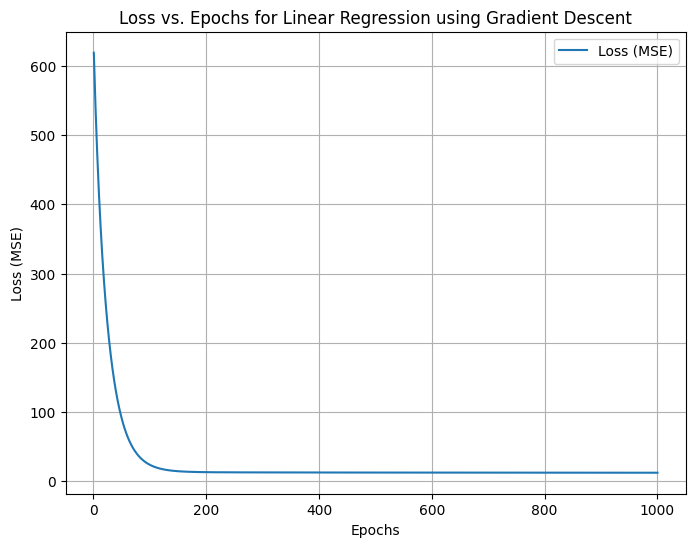

In [340]:
import numpy as np
import matplotlib.pyplot as plt

# Train-Test Split function
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    n = X.shape[0]
    indices = np.arange(n)
    np.random.shuffle(indices)

    split_point = int(n * (1 - test_size))
    X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
    y_train, y_test = y[indices[:split_point]], y[indices[split_point:]]

    return X_train, X_test, y_train, y_test

# Linear Regression using Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
    m, n = X.shape
    theta = np.zeros(n)
    losses = []  # List to store the loss at each iteration

    for _ in range(iterations):
        y_pred = X @ theta
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)

        gradients = (2/m) * X.T @ (y_pred - y)
        theta -= learning_rate * gradients

    return theta, losses

# Predict function
def predict(X, theta):
    X = np.c_[np.ones(X.shape[0]), X]
    return X @ theta

# MSE and R-squared calculations
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Prepare data
X = df_cleaned[numeric_cols].values
y = df_cleaned['mpg'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


theta_gd, losses = gradient_descent(X_train, y_train, learning_rate=0.01, iterations=1000)

# Predict on test set
y_pred_test_gd = predict(X_test, theta_gd)

# Evaluate Linear Regression model
mse_gd = mse(y_test, y_pred_test_gd)
r2_gd = r_squared(y_test, y_pred_test_gd)

print(f"Linear Regression (Gradient Descent) - MSE: {mse_gd:.4f}, R-squared: {r2_gd:.4f}")

# Plot loss vs epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(losses) + 1), losses, label='Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs. Epochs for Linear Regression using Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


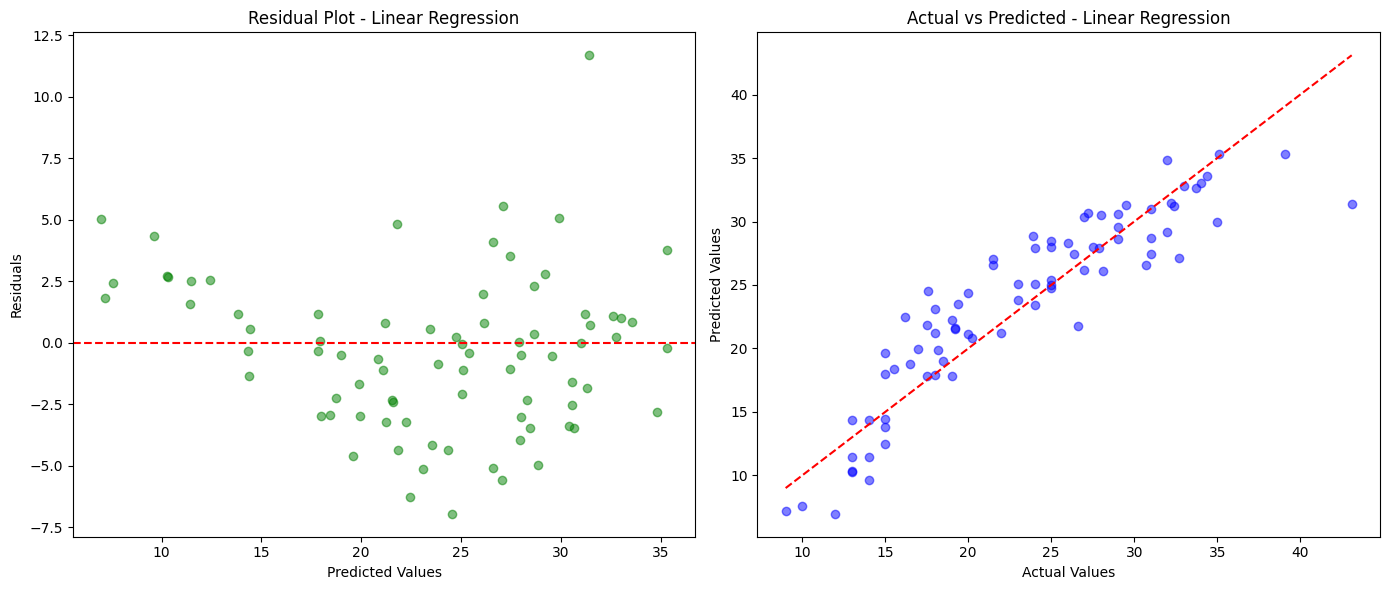

In [341]:
def plot_results(y_test, y_pred, residuals, model_name):
    plt.figure(figsize=(14, 6))

    # Residual Plot
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals, alpha=0.5, color='green')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}')

    # Actual vs Predicted Plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')

    plt.tight_layout()
    plt.show()

# Calculate residuals
residuals_gd = y_test - y_pred_test_gd
plot_results(y_test, y_pred_test_gd, residuals_gd, "Linear Regression")

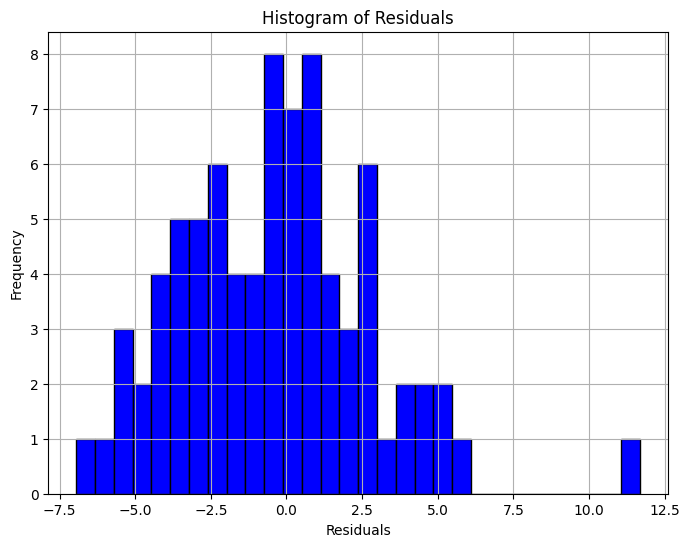

In [342]:
plt.figure(figsize=(8, 6))
plt.hist(residuals_gd, bins=30, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

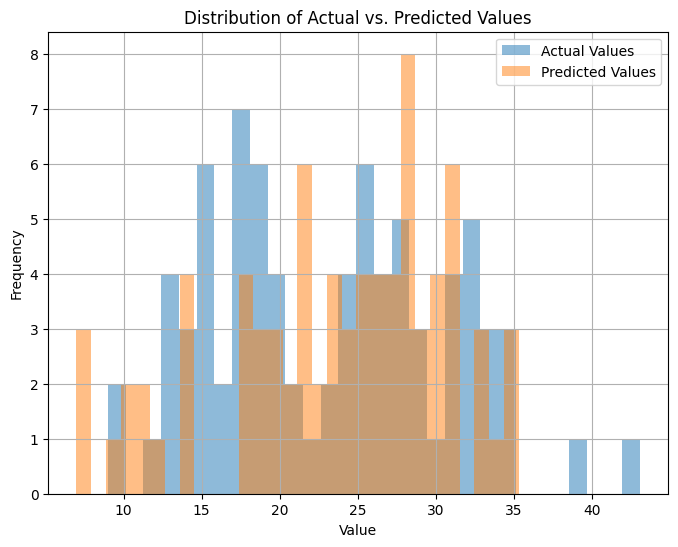

In [343]:
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Values')
plt.hist(y_pred_test_gd, bins=30, alpha=0.5, label='Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [344]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def convert_to_category(df):
    df['displacement_cat'] = pd.cut(df['displacement'], bins=[0, 200, 300, np.inf], labels=['small', 'medium', 'large'])
    df['horsepower_cat'] = pd.cut(df['horsepower'], bins=[0, 100, 150, np.inf], labels=['low', 'medium', 'high'])
    df['weight_cat'] = pd.cut(df['weight'], bins=[0, 2500, 3500, np.inf], labels=['light', 'medium', 'heavy'])
    df['mpg_cat'] = pd.cut(df['mpg'], bins=[0, 20, 30, np.inf], labels=['low', 'medium', 'high'])
    return df

# Encode categorical features as numeric
def encode_features(df, feature_columns):
    le = {col: {val: i for i, val in enumerate(df[col].unique())} for col in feature_columns}
    for col in feature_columns:
        df[col] = df[col].map(le[col])
    return df, le

# Function to train Naive Bayes model
def naive_bayes_train(X, y):
    class_counts = {}
    feature_counts = {}

    for i in range(len(y)):
        cls = y[i]
        if cls not in class_counts:
            class_counts[cls] = 0
        class_counts[cls] += 1

        for j in range(len(X[i])):
            feature_value = X[i][j]
            if j not in feature_counts:
                feature_counts[j] = {}
            if feature_value not in feature_counts[j]:
                feature_counts[j][feature_value] = {}
            if cls not in feature_counts[j][feature_value]:
                feature_counts[j][feature_value][cls] = 0
            feature_counts[j][feature_value][cls] += 1

    return class_counts, feature_counts

# Function to predict using Naive Bayes model
def naive_bayes_predict(X, class_counts, feature_counts):
    total_count = sum(class_counts.values())
    classes = list(class_counts.keys())
    preds = []

    for sample in X:
        class_probs = {}
        for cls in classes:
            class_prob = np.log(class_counts[cls] / total_count)
            for j in range(len(sample)):
                feature_value = sample[j]
                feature_prob = feature_counts.get(j, {}).get(feature_value, {}).get(cls, 0) / class_counts[cls]
                class_prob += np.log(feature_prob + 1e-6)  # Add smoothing
            class_probs[cls] = class_prob
        preds.append(max(class_probs, key=class_probs.get))

    return preds


df_categorical = convert_to_category(df_cleaned)
feature_cols = ['displacement_cat', 'horsepower_cat', 'weight_cat', 'origin']
df_categorical, encoders = encode_features(df_categorical, feature_cols)

# Prepare features and target for Naive Bayes
X_nb = df_categorical[feature_cols].values
y_nb = df_categorical['mpg_cat'].values

# Split data for Naive Bayes
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=0)

# Train Naive Bayes model
class_counts, feature_counts = naive_bayes_train(X_train_nb, y_train_nb)

# Predict using the Naive Bayes model
y_pred_nb = naive_bayes_predict(X_test_nb, class_counts, feature_counts)

# Calculate accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print(f"Naive Bayes Classifier Accuracy: {accuracy_nb:.4f}")


Naive Bayes Classifier Accuracy: 0.7250


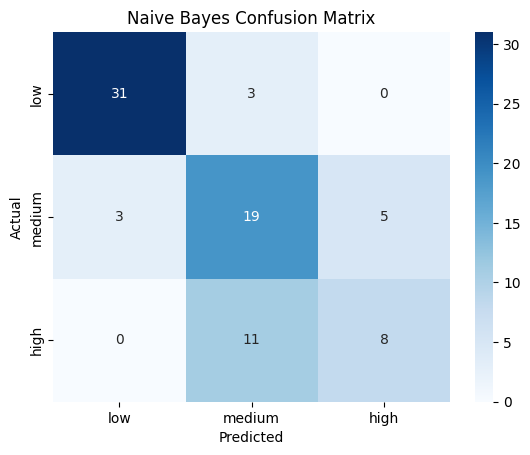

Classification Report:
               precision    recall  f1-score   support

         low       0.62      0.42      0.50        19
      medium       0.91      0.91      0.91        34
        high       0.58      0.70      0.63        27

    accuracy                           0.73        80
   macro avg       0.70      0.68      0.68        80
weighted avg       0.73      0.72      0.72        80



In [345]:
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test_nb, y_pred_nb, labels=['low', 'medium', 'high'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test_nb, y_pred_nb, target_names=['low', 'medium', 'high']))

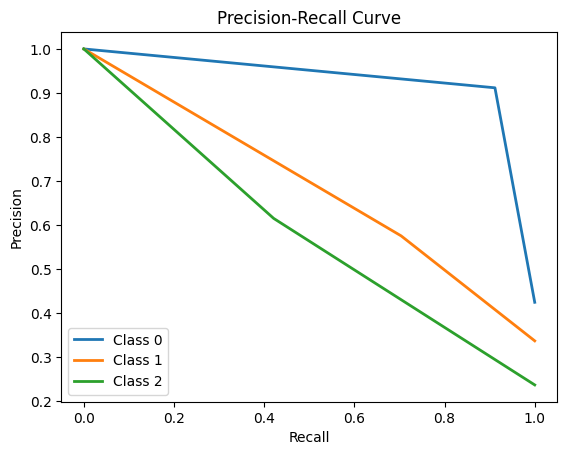

In [346]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test_nb, classes=['low', 'medium', 'high'])
y_pred_bin = label_binarize(y_pred_nb, classes=['low', 'medium', 'high'])

precision = dict()
recall = dict()
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])

# Plot PR curves
plt.figure()
for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

Hybrid Model - MSE: 10.0201, R-squared: 0.8175


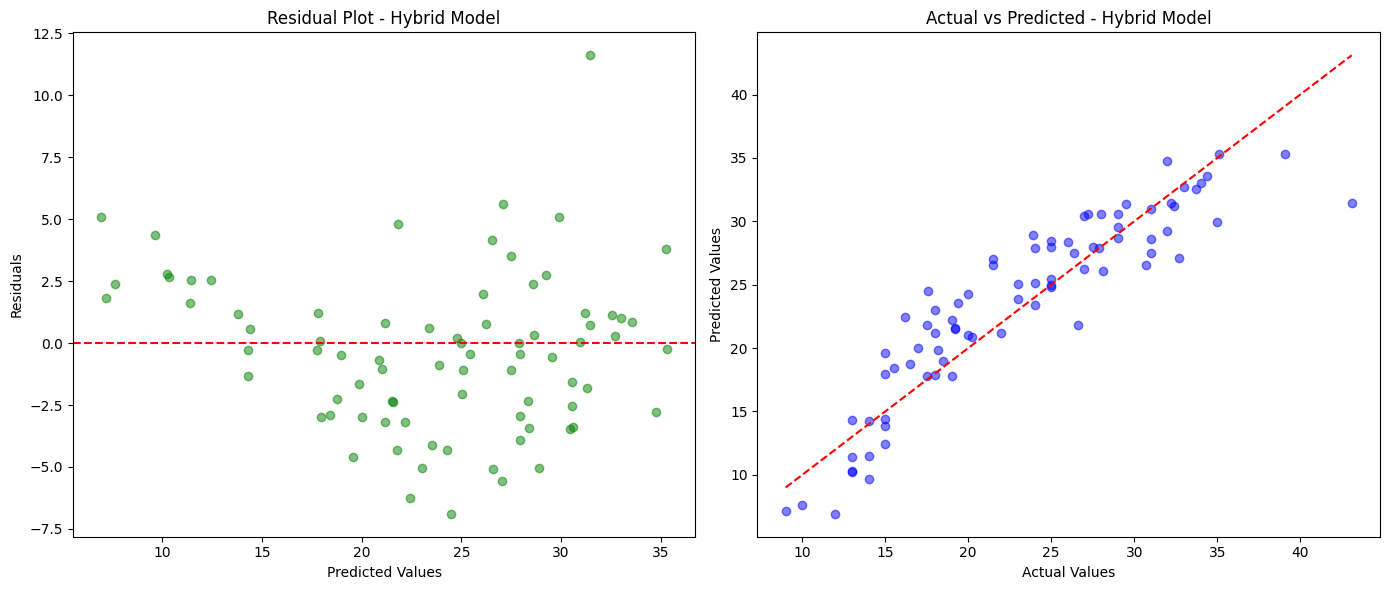

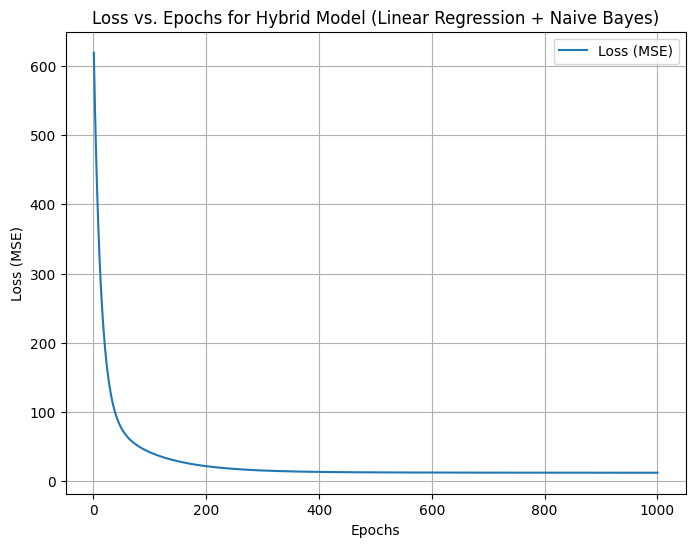

In [347]:
# Convert categories (Naive Bayes predictions) to numeric labels
def convert_categories_to_numeric(categories):
    mapping = {'low': 0, 'medium': 1, 'high': 2}
    return np.array([mapping[cat] for cat in categories])

# Add Naive Bayes predictions as a feature to Linear Regression
y_train_nb_numeric = convert_categories_to_numeric(naive_bayes_predict(X_train_nb, class_counts, feature_counts)).reshape(-1, 1)
y_test_nb_numeric = convert_categories_to_numeric(naive_bayes_predict(X_test_nb, class_counts, feature_counts)).reshape(-1, 1)

# Combine original numerical features with Naive Bayes predictions
X_train_hybrid = np.hstack([X_train, y_train_nb_numeric])  # Use hstack to ensure correct dimension alignment
X_test_hybrid = np.hstack([X_test, y_test_nb_numeric])

# Train Hybrid Linear Regression model using gradient descent
theta_hybrid, losses_hybrid = gradient_descent(X_train_hybrid, y_train, learning_rate=0.01, iterations=1000)

# Predict using the Hybrid model
y_pred_hybrid = predict(X_test_hybrid, theta_hybrid)

# Evaluate the hybrid model
mse_hybrid = mse(y_test, y_pred_hybrid)
r2_hybrid = r_squared(y_test, y_pred_hybrid)

print(f"Hybrid Model - MSE: {mse_hybrid:.4f}, R-squared: {r2_hybrid:.4f}")

# Plotting results for the hybrid model
residuals_hybrid = y_test - y_pred_hybrid
plot_results(y_test, y_pred_hybrid, residuals_hybrid, "Hybrid Model")

# Plot loss vs epochs for hybrid model
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(losses_hybrid) + 1), losses_hybrid, label='Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs. Epochs for Hybrid Model (Linear Regression + Naive Bayes)')
plt.legend()
plt.grid(True)
plt.show()
